In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# NCATS CYP3A4
Dataset from https://opendata.ncats.nih.gov/adme/data

https://pubchem.ncbi.nlm.nih.gov/bioassay/1645841#section=Description

## Assay info

Chemical compounds were tested for their effect on CYP enzyme activities by using P450-Glo (TM) screening systems (Promega Corporation, Madison, WI). These systems provide a luminescent method containing proluciferin substrates and are converted to luciferin products by CYP isozymes. The luciferin products formed are detected with a luciferin detection reagent, and the amount of light produced is proportional to CYP activity. P450-Glo (TM) CYP screening system (Catalog. No. V9890) was used to detect the compounds that interfere in CYP activity. The positive control compound used for CYP assay is quinidine (Sigma-Aldrich, St. Louis, MO).


PUBCHEM_ACTIVITY_OUTCOME: Corresponds to PUBCHEM_ACTIVITY_SCORE. For all inactive compounds, PUBCHEM_ACTIVITY_SCORE is 0. For all active compounds, a score range was given for each curve class type given above. Active antagonist compounds have PUBCHEM_ACTIVITY_SCORE between 40 and 100. 

PUBCHEM_ACTIVITY_SCORE: Average of 5 experimental replicates. Fit_LogAC50 was used for determining relative score and was scaled to each curve class' score range.


In [3]:
df = pd.read_csv("NCATS_CYP_raw/AID_1645841_datatable_all.csv")

/tmp/ipykernel_144674/2645318791.py:1: DtypeWarning: Columns (0,8,9,10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NCATS_CYP_raw/AID_1645841_datatable_all.csv")


In [4]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT',
       'Phenotype-Replicate_1', 'Potency-Replicate_1', 'Efficacy-Replicate_1',
       ...
       'Activity at 0.910 uM-Replicate_5', 'Activity at 1.182 uM-Replicate_5',
       'Activity at 2.302 uM-Replicate_5', 'Activity at 4.834 uM-Replicate_5',
       'Activity at 11.49 uM-Replicate_5', 'Activity at 23.94 uM-Replicate_5',
       'Activity at 57.45 uM-Replicate_5', 'Activity at 115.4 uM-Replicate_5',
       'Activity at 193.5 uM-Replicate_5', 'Activity at 288.3 uM-Replicate_5'],
      dtype='object', length=203)

In [5]:
# first 5 rows are metadata 
df[0:5]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,Efficacy-Replicate_1,...,Activity at 0.910 uM-Replicate_5,Activity at 1.182 uM-Replicate_5,Activity at 2.302 uM-Replicate_5,Activity at 4.834 uM-Replicate_5,Activity at 11.49 uM-Replicate_5,Activity at 23.94 uM-Replicate_5,Activity at 57.45 uM-Replicate_5,Activity at 115.4 uM-Replicate_5,Activity at 193.5 uM-Replicate_5,Activity at 288.3 uM-Replicate_5
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,STRING,FLOAT,FLOAT,...,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: inhibitor...,Concentration at which compound exhibits half-...,"Maximal efficacy of compound, reported as a pe...",...,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,PERCENT,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.909733,1.18163,2.3015,4.83399,11.4937,23.9433,57.447,115.368,193.451,288.3


In [6]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,Efficacy-Replicate_1,...,Activity at 0.910 uM-Replicate_5,Activity at 1.182 uM-Replicate_5,Activity at 2.302 uM-Replicate_5,Activity at 4.834 uM-Replicate_5,Activity at 11.49 uM-Replicate_5,Activity at 23.94 uM-Replicate_5,Activity at 57.45 uM-Replicate_5,Activity at 115.4 uM-Replicate_5,Activity at 193.5 uM-Replicate_5,Activity at 288.3 uM-Replicate_5
0,1,104223880.0,197033.0,Active,43.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,10.684,136.193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11111456.0,5281670.0,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inactive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,11113977.0,6604832.0,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,37.9083,105.983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,124879150.0,5280443.0,Active,84.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,6.0081,112.724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,124879975.0,836.0,Active,63.0,http://assay.nih.gov/htsws/rest/display/p450-i...,NaN,Inhibitor,3.0112,57.7747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

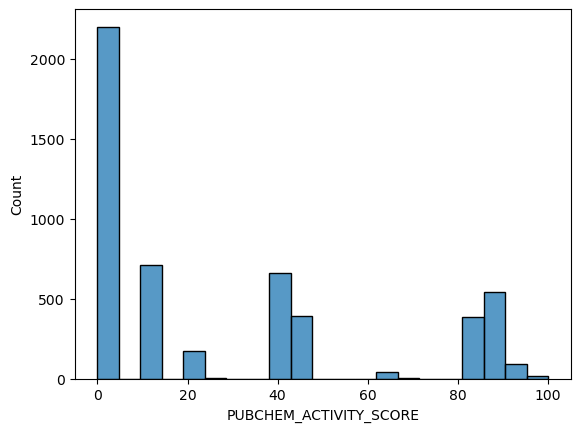

In [9]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

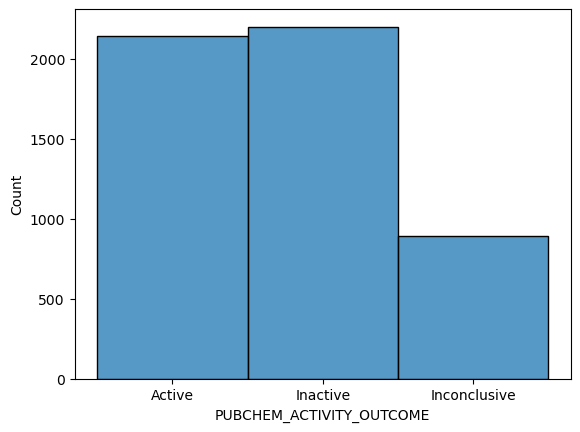

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

In [11]:
# clean up the main_dataset

In [12]:
activity_cols = ["PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_ACTIVITY_SCORE"]

In [13]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [14]:
len(df)

5242

In [15]:
df = df.dropna(subset="PUBCHEM_CID")

In [16]:
len(df)

5238

In [17]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)

In [18]:
df["PUBCHEM_CID"]

0         197033
1        5281670
2        6604832
3        5280443
4            836
          ...   
5237    11957637
5238        4906
5239        5593
5240        2968
5241      108107
Name: PUBCHEM_CID, Length: 5238, dtype: int64

In [22]:
import pubchempy as pcp
import json



Signature:
pcp.get_cids(
    identifier,
    namespace='name',
    domain='compound',
    searchtype=None,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/mambaforge/envs/openadmet_sklearn/lib/python3.12/site-packages/pubchempy.py
Type:      function

In [ ]:
# THIS TAKES A BILLION YEARS

#df["PCSMILES"] = df["PUBCHEM_CID"].progress_apply(lambda x: pcp.Compound.from_cid(x).canonical_smiles)

In [25]:
import dask.dataframe as dd

In [27]:
dd.from_pandas(df)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,Efficacy-Replicate_1,Analysis Comment-Replicate_1,Activity_Score-Replicate_1,Curve_Description-Replicate_1,Fit_LogAC50-Replicate_1,Fit_HillSlope-Replicate_1,Fit_R2-Replicate_1,Fit_InfiniteActivity-Replicate_1,Fit_ZeroActivity-Replicate_1,Fit_CurveClass-Replicate_1,Excluded_Points-Replicate_1,Max_Response-Replicate_1,Activity at 0.0000073560 uM-Replicate_1,Activity at 0.0000367800 uM-Replicate_1,Activity at 0.0000735600 uM-Replicate_1,Activity at 0.0001677464 uM-Replicate_1,Activity at 0.0003678000 uM-Replicate_1,Activity at 0.0007362988 uM-Replicate_1,Activity at 0.00153 uM-Replicate_1,Activity at 0.00368 uM-Replicate_1,Activity at 0.00723 uM-Replicate_1,Activity at 0.00914 uM-Replicate_1,Activity at 0.018 uM-Replicate_1,Activity at 0.039 uM-Replicate_1,Activity at 0.092 uM-Replicate_1,Activity at 0.191 uM-Replicate_1,Activity at 0.460 uM-Replicate_1,Activity at 0.910 uM-Replicate_1,Activity at 1.182 uM-Replicate_1,Activity at 2.302 uM-Replicate_1,Activity at 4.834 uM-Replicate_1,Activity at 11.49 uM-Replicate_1,Activity at 23.94 uM-Replicate_1,Activity at 57.45 uM-Replicate_1,Activity at 115.4 uM-Replicate_1,Activity at 193.5 uM-Replicate_1,Activity at 288.3 uM-Replicate_1,Compound QC-Replicate_1,Phenotype-Replicate_2,Potency-Replicate_2,Efficacy-Replicate_2,Analysis Comment-Replicate_2,Activity_Score-Replicate_2,Curve_Description-Replicate_2,Fit_LogAC50-Replicate_2,Fit_HillSlope-Replicate_2,Fit_R2-Replicate_2,Fit_InfiniteActivity-Replicate_2,Fit_ZeroActivity-Replicate_2,Fit_CurveClass-Replicate_2,Excluded_Points-Replicate_2,Max_Response-Replicate_2,Activity at 0.0000073560 uM-Replicate_2,Activity at 0.0000367800 uM-Replicate_2,Activity at 0.0000735600 uM-Replicate_2,Activity at 0.0001677464 uM-Replicate_2,Activity at 0.0003678000 uM-Replicate_2,Activity at 0.0007362988 uM-Replicate_2,Activity at 0.00153 uM-Replicate_2,Activity at 0.00368 uM-Replicate_2,Activity at 0.00723 uM-Replicate_2,Activity at 0.00914 uM-Replicate_2,Activity at 0.018 uM-Replicate_2,Activity at 0.039 uM-Replicate_2,Activity at 0.092 uM-Replicate_2,Activity at 0.191 uM-Replicate_2,Activity at 0.460 uM-Replicate_2,Activity at 0.910 uM-Replicate_2,Activity at 1.182 uM-Replicate_2,Activity at 2.302 uM-Replicate_2,Activity at 4.834 uM-Replicate_2,Activity at 11.49 uM-Replicate_2,Activity at 23.94 uM-Replicate_2,Activity at 57.45 uM-Replicate_2,Activity at 115.4 uM-Replicate_2,Activity at 193.5 uM-Replicate_2,Activity at 288.3 uM-Replicate_2,Phenotype-Replicate_3,Potency-Replicate_3,Efficacy-Replicate_3,Analysis Comment-Replicate_3,Activity_Score-Replicate_3,Curve_Description-Replicate_3,Fit_LogAC50-Replicate_3,Fit_HillSlope-Replicate_3,Fit_R2-Replicate_3,Fit_InfiniteActivity-Replicate_3,Fit_ZeroActivity-Replicate_3,Fit_CurveClass-Replicate_3,Excluded_Points-Replicate_3,Max_Response-Replicate_3,Activity at 0.0000073560 uM-Replicate_3,Activity at 0.0000367800 uM-Replicate_3,Activity at 0.0000735600 uM-Replicate_3,Activity at 0.0001677464 uM-Replicate_3,Activity at 0.0003678000 uM-Replicate_3,Activity at 0.0007362988 uM-Replicate_3,Activity at 0.00153 uM-Replicate_3,Activity at 0.00368 uM-Replicate_3,Activity at 0.00723 uM-Replicate_3,Activity at 0.00914 uM-Replicate_3,Activity at 0.018 uM-Replicate_3,Activity at 0.039 uM-Replicate_3,Activity at 0.092 uM-Replicate_3,Activity at 0.191 uM-Replicate_3,Activity at 0.460 uM-Replicate_3,Activity at 0.910 uM-Replicate_3,Activity at 1.182 uM-Replicate_3,Activity at 2.302 uM-Replicate_3,Activity at 4.834 uM-Replicate_3,Activity at 11.49 uM-Replicate_3,Activity at 23.94 uM-Replicate_3,Activity at 57.45 uM-Replicate_3,Activity at 115.4 uM-Replicate_3,Activity at 193.5 uM-Replicate_3,Activity at 288.3 uM-Replicate_3,Phenotype-Replicate_4,Potency-Replicate_4,Efficacy-Replicate_4,Analysis Comment-Replicate_4,Activity_Score-Replicate_4,Curve_Descrip

In [ ]:
# Define a function that fetches the canonical SMILES from PubChem using PubChem CID
def get_canonical_smiles(cid):
    try:
        compound = pcp.Compound.from_cid(cid)
        return compound.canonical_smiles
    except Exception as e:
        return None  # Handle cases where the CID is invalid or the request fails

# Assuming df is a pandas DataFrame and you've already converted it to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=100)  # You can adjust the number of partitions based on your dataset size

# Apply the function in parallel across partitions using Dask
ddf['PCSMILES'] = ddf['PUBCHEM_CID'].map_partitions(lambda part: part.apply(get_canonical_smiles), meta=('x', 'object'))

# Optionally, you can use a progress bar to track the computation
with ProgressBar():
    result = ddf.compute()